# **Machine Learning**
## *Lab Session 5*

In [7]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

### A1. If your project deals with a regression problem, please use one attribute of your dataset (X_train) along with the target values (y_train) for training a linear regression model.

In [2]:
def create_intensity_classes(df):
    # Define thresholds based on percentiles or domain knowledge
    low_threshold = df['max'].quantile(0.33)
    high_threshold = df['max'].quantile(0.66)
    
    # Create class labels
    conditions = [
        (df['max'] < low_threshold),
        (df['max'] >= low_threshold) & (df['max'] < high_threshold),
        (df['max'] >= high_threshold)
    ]
    class_labels = [0, 1, 2]  # or ['Low', 'Medium', 'High']
    
    return np.select(conditions, class_labels)
    
data = pd.read_csv("../project/combined_seismic_data.csv")
data["class"] = create_intensity_classes(data)




In [3]:
correlation = data[['mean', 'std', 'max', 'peak_to_peak', 'dominant_freq', 'spectral_centroid', 'energy', 'distance_to_event']].corr()
print(correlation)

X = data[['dominant_freq']]  # Feature
y = data['spectral_centroid'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



                       mean       std       max  peak_to_peak  dominant_freq  \
mean               1.000000  0.070754  0.056970      0.064175      -0.001262   
std                0.070754  1.000000  0.976841      0.980652      -0.065901   
max                0.056970  0.976841  1.000000      0.997519      -0.070847   
peak_to_peak       0.064175  0.980652  0.997519      1.000000      -0.068938   
dominant_freq     -0.001262 -0.065901 -0.070847     -0.068938       1.000000   
spectral_centroid -0.004326 -0.134713 -0.144536     -0.140476       0.693805   
energy             0.046564  0.913100  0.844319      0.854345      -0.033586   
distance_to_event  0.004177  0.013537 -0.024954     -0.029794      -0.137173   

                   spectral_centroid    energy  distance_to_event  
mean                       -0.004326  0.046564           0.004177  
std                        -0.134713  0.913100           0.013537  
max                        -0.144536  0.844319          -0.024954  
peak_to

LinearRegression()

### A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1. Perform prediction on the test data and compare the metric values between train and test set.

In [4]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

r2 = model.score(X_test, y_test)
print(f'R² Score: {r2}')

Mean Squared Error: 6.017007567847193
Root Mean Squared Error: 2.452958941329266
Mean Absolute Percentage Error: 1.3488236091062635
R² Score: 0.1886048797965747


### A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [5]:
X = data[['max', 'peak_to_peak', 'dominant_freq']]  # Feature
y = data['spectral_centroid'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

r2 = model.score(X_test, y_test)
print(f'R² Score: {r2}')

Mean Squared Error: 5.879887383364424
Root Mean Squared Error: 2.424847909326361
Mean Absolute Percentage Error: 1.3479722661973539
R² Score: 0.207095574268232


### A4. Perform k-means clustering on your data. Please remove / ignore the target variable for performing clustering

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Centers:\n", centers)


Cluster Centers:
 [[2.70552905e+07 5.11041906e+07 3.90625000e-01]
 [1.23980766e+06 2.20719652e+06 9.00474502e-01]]


### A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Inde

In [9]:
silhouette = silhouette_score(X_train, labels)
ch_score = calinski_harabasz_score(X_train, labels)
db_index = davies_bouldin_score(X_train, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.9080276556624347
Calinski-Harabasz Score: 2259.317569027737
Davies-Bouldin Index: 0.35913670099388256


### A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value. Make a plot of the values against the k value to determine the optimal cluster count.

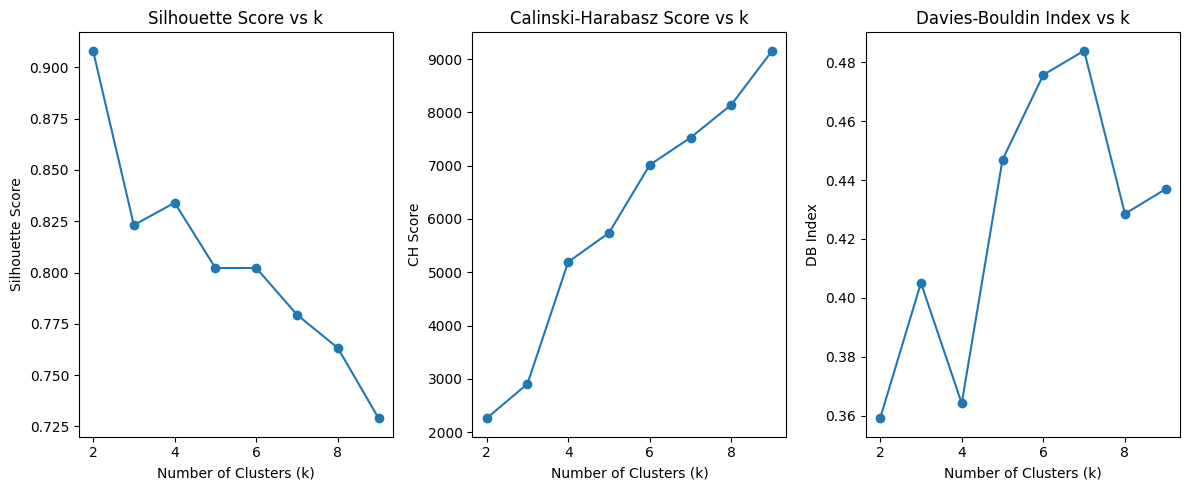

In [10]:
k_values = range(2, 10)
silhouette_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()


### A7. Using elbow plot, determine the optimal k value for k-means clustering.

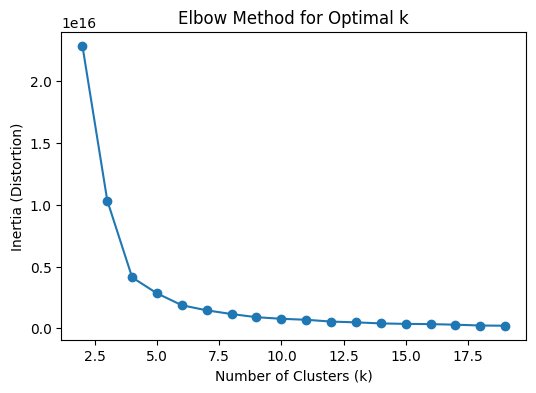

In [11]:
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.show()
